<a href="https://colab.research.google.com/github/nadyadtm/Abalone-Repository/blob/master/AbaloneRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression (Abalone Dataset)

Dataset Abalone merupakan dataset yang bersumber dari MLData. Dalam dataset ini, kita harus memprediksi umur dari abalone dari fisik si abalonenya itu sendiri. Abalone merupakan semacam kerang. Pada notebook ini akan melakukan regresi sederhana

## Step-step Regresi

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ayo kita upload datasetnya

In [27]:
link = 'https://raw.githubusercontent.com/nadyadtm/Abalone-Repository/master/abalone_dataset.csv'
df = pd.read_csv(link)
df.head(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Deskripsi Data

Melihat tipe data dari atribut

In [28]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

Melihat apakah ada yang bernilai null (missing values)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Visualisasi data




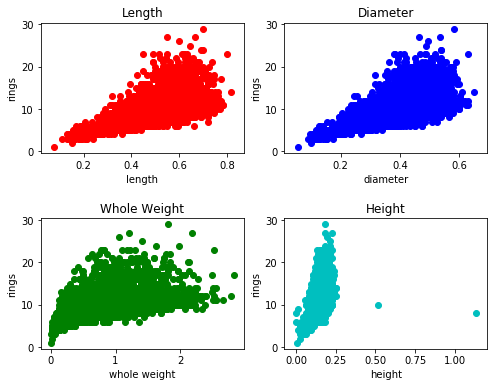

In [86]:
fig = plt.figure(figsize=(8,6))

plt.subplot(2, 2, 1)
plt.title("Length")
plt.scatter(df['length'],df['rings'],color="r" )
plt.xlabel('length')
plt.ylabel('rings')

plt.subplot(2, 2, 2)
plt.title("Diameter")
plt.scatter(df['diameter'],df['rings'],color="b")
plt.xlabel('diameter')
plt.ylabel('rings')

plt.subplot(2, 2, 3)
plt.title("Whole Weight")
plt.scatter(df['whole_weight'],df['rings'],color="g")
plt.xlabel('whole weight')
plt.ylabel('rings')

plt.subplot(2, 2, 4)
plt.title("Height")
plt.scatter(df['height'],df['rings'],color="c")
plt.xlabel('height')
plt.ylabel('rings')

plt.subplots_adjust(hspace=0.5)
plt.show()

## Train Test Split

Kita akan membagi data menjadi dua bagian, yaitu data train dan data test dengan menggunakan code sebagai berikut

In [0]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

Ambil salah satu atribut yang dicari hubungannya. Disini saya akan memilih atribut Diameter

In [0]:
x_data = train['length']
y = train['rings']

In [33]:
x_data

1       0.350
2       0.530
3       0.440
4       0.330
5       0.425
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: length, Length: 3346, dtype: float64

## Linear Regression

Setelah itu cari intercept(b) dan coefficient(a)-nya, untuk bentuk matriksnya adalah sebagai berikut

In [0]:
m = train.shape[0]
sumxi = x_data.sum()
sumxi2 = (x_data**2).sum()
sumyi = y.sum()
sumxiyi = (y*x_data).sum()

A = np.array([[m,sumxi],[sumxi,sumxi2]])
B = np.array([[sumyi],[sumxiyi]])
b,a=np.linalg.inv(A)@B

In [0]:
def f(a,b,x):
  return a*x+b

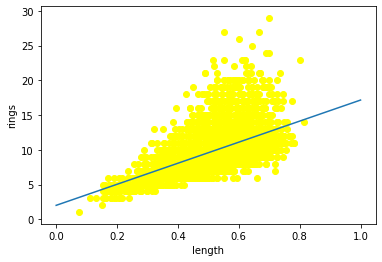

In [36]:
x = np.linspace(0,1,15)
plt.plot(x,f(a,b,x))
plt.scatter(x_data,y,color='yellow')
plt.xlabel('length')
plt.ylabel('rings')
plt.show()

## Non Linear Regression (Exponential)



Selanjutnya kita akan menggunakan fungsi eksponensial. Untuk bentuk matriksnya adalah sebagai berikut

In [0]:
sumxi = x_data.sum()
sumxi2 = (x_data**2).sum()
sumyi = np.log(abs(y)).sum()
sumxiyi = (np.log(abs(y)) * x_data).sum()
m = train.shape[0]

A = np.array([[m,sumxi],[sumxi,sumxi2]])
B = np.array([[sumyi],[sumxiyi]])

lnb,a = np.linalg.inv(A)@B

import math
b = np.exp(lnb)

In [0]:
def f3(a,b,x):
  return b*np.exp(a*x)

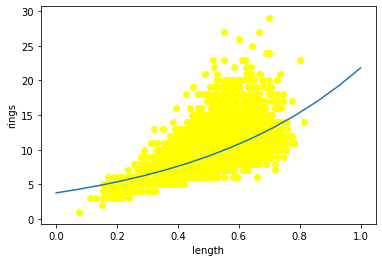

In [39]:
x = np.linspace(0,1,15)
plt.plot(x,f3(a,b,x))
plt.scatter(x_data,y,color='yellow')
plt.xlabel('length')
plt.ylabel('rings')
plt.show()

## Menghitung Akurasi

Selanjutnya marilah kita hitung akurasi dari kedua model yang sudah dibuat

In [0]:
#mengambi data test dan labelnya
x_test = test['length']
y_test = test['rings']

In [61]:
import math

#prediksi dengan menggunakan regresi linear
y_predlinear=f(a,b,x_test)
rmse1=((y_predlinear-y_test)**2).sum()/y_test.shape[0]
rmse1=math.sqrt(rmse1)

#prediksi dengan menggunakan regresi non linear eksponensial
y_predexp=f3(a,b,x_test)
rmse2=((y_predexp-y_test)**2).sum()/y_test.shape[0]
rmse2=math.sqrt(rmse2)

#print hasil
print('Root Mean Square Error Regresi Linear : ',rmse1)
print('Root Mean Square Error Regresi non-linear (exponensial) : ',rmse2)

Root Mean Square Error Regresi Linear :  5.9653392773810845
Root Mean Square Error Regresi non-linear (exponensial) :  2.676188739722262


Seperti yang bisa kita lihat, dengan menggunakan atribut length, umur abalone dapat diprediksikan dengan baik dengan menggunakan regresi non-linear exponensial. Silakan coba dengan menggunakan atribut lain dan lihat hasilnya :)

Copyright Nadya Aditama